In [51]:
from datahandler.constants import all_features
from datahandler.data_preprocessing_from_jupyter import load_train_test_data_raw_normalized, load_train_test_data_added_features_normalized, load_train_test_data_added_features_pca
from matplotlib import pyplot as plt
from sklearn import svm
import pandas as pd

In [2]:
x_train, y_train, x_test, y_test = load_train_test_data_added_features_normalized()

Loading from file: /Users/duc.letran/Desktop/FINAL PROJECT/context_transformer/data/v3/train/px4_datacollection.csv (1/24)
Loading from file: /Users/duc.letran/Desktop/FINAL PROJECT/context_transformer/data/v3/train/ps1_datacollection.csv (2/24)
Loading from file: /Users/duc.letran/Desktop/FINAL PROJECT/context_transformer/data/v3/train/tc4_datacollection.csv (3/24)
Loading from file: /Users/duc.letran/Desktop/FINAL PROJECT/context_transformer/data/v3/train/ss3_datacollection.csv (4/24)
Loading from file: /Users/duc.letran/Desktop/FINAL PROJECT/context_transformer/data/v3/train/ps2_datacollection.csv (5/24)
Loading from file: /Users/duc.letran/Desktop/FINAL PROJECT/context_transformer/data/v3/train/op4_datacollection.csv (6/24)
Loading from file: /Users/duc.letran/Desktop/FINAL PROJECT/context_transformer/data/v3/train/op2_datacollection.csv (7/24)
Loading from file: /Users/duc.letran/Desktop/FINAL PROJECT/context_transformer/data/v3/train/ps4_datacollection.csv (8/24)
Loading from fil

In [17]:
print("Data shape: X_train - " + str(x_train.shape) + " | X_test - " + str(x_test.shape))

Data shape: X_train - (5770, 60) | X_test - (1426, 60)


In [18]:
feature_columns = []
raw_features = all_features
added_features = ["accMag", "gyroMag", "magMag", "accAng", "gyroAng", "magAng"]
domain_types = raw_features + added_features
feature_types = ["mean", "std", "min", "max"]
for domain_type in domain_types:
    for feature_type in feature_types:
        feature_columns.append(feature_type + domain_type)
print("There are " + str(len(feature_columns)) + " features. They are: ")
print(feature_columns)

There are 60 features. They are: 
['meanaccelerometerX', 'stdaccelerometerX', 'minaccelerometerX', 'maxaccelerometerX', 'meanaccelerometerY', 'stdaccelerometerY', 'minaccelerometerY', 'maxaccelerometerY', 'meanaccelerometerZ', 'stdaccelerometerZ', 'minaccelerometerZ', 'maxaccelerometerZ', 'meangyroscopeX', 'stdgyroscopeX', 'mingyroscopeX', 'maxgyroscopeX', 'meangyroscopeY', 'stdgyroscopeY', 'mingyroscopeY', 'maxgyroscopeY', 'meangyroscopeZ', 'stdgyroscopeZ', 'mingyroscopeZ', 'maxgyroscopeZ', 'meanmagnetometerX', 'stdmagnetometerX', 'minmagnetometerX', 'maxmagnetometerX', 'meanmagnetometerY', 'stdmagnetometerY', 'minmagnetometerY', 'maxmagnetometerY', 'meanmagnetometerZ', 'stdmagnetometerZ', 'minmagnetometerZ', 'maxmagnetometerZ', 'meanaccMag', 'stdaccMag', 'minaccMag', 'maxaccMag', 'meangyroMag', 'stdgyroMag', 'mingyroMag', 'maxgyroMag', 'meanmagMag', 'stdmagMag', 'minmagMag', 'maxmagMag', 'meanaccAng', 'stdaccAng', 'minaccAng', 'maxaccAng', 'meangyroAng', 'stdgyroAng', 'mingyroAng', '

In [71]:
def f_importances(coef, names):
    imp = coef
    imp, names = zip(*sorted(zip(imp, names)))
    plt.rcParams["figure.figsize"] = (16,11)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

In [54]:
svm = svm.SVC(kernel='linear')

In [55]:
x_train_transformed = [x.tolist() for x in x_train] + [x.tolist() for x in x_test]
y_train_transformed = y_train.tolist() + y_test.tolist()
svm.fit(x_train_transformed, y_train_transformed)

SVC(kernel='linear')

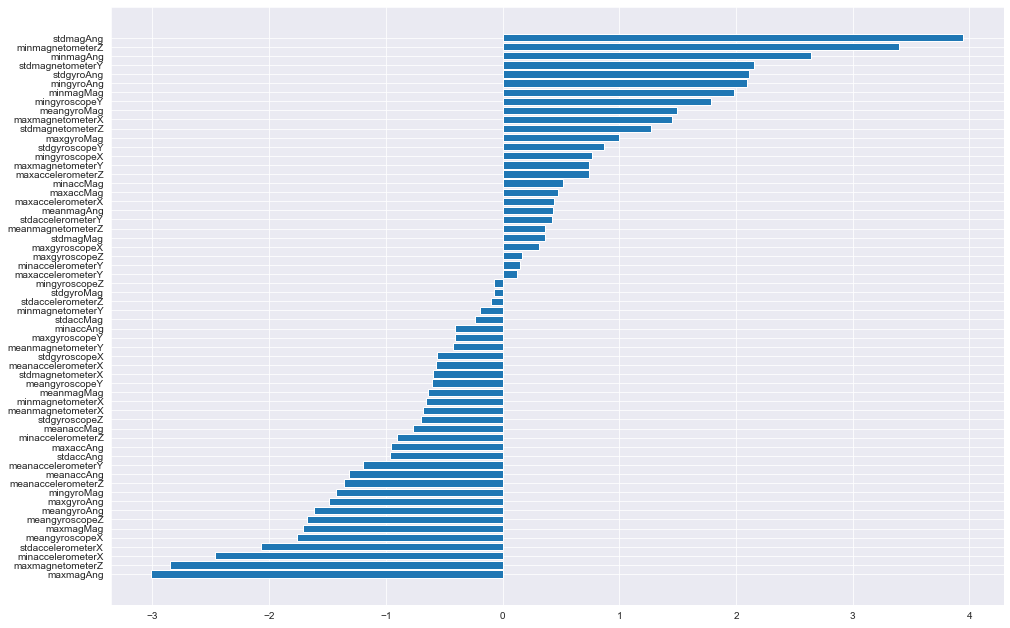

In [72]:
f_importances(svm.coef_[0], feature_columns)

stdmagAng             3.944742
minmagnetometerZ      3.395757
maxmagAng             3.008480
maxmagnetometerZ      2.852286
minmagAng             2.644466
minaccelerometerX     2.465162
stdmagnetometerY      2.152525
stdgyroAng            2.114570
mingyroAng            2.093968
stdaccelerometerX     2.072149
minmagMag             1.980150
mingyroscopeY         1.782695
meangyroscopeX        1.761475
maxmagMag             1.711474
meangyroscopeZ        1.676065
meangyroAng           1.612407
meangyroMag           1.494647
maxgyroAng            1.485517
maxmagnetometerX      1.450384
mingyroMag            1.425079
meanaccelerometerZ    1.361287
meanaccAng            1.315518
stdmagnetometerZ      1.268657
meanaccelerometerY    1.196856
maxgyroMag            0.999580
stdaccAng             0.961223
maxaccAng             0.952270
minaccelerometerZ     0.902600
stdgyroscopeY         0.869094
meanaccMag            0.767012
mingyroscopeX         0.765943
maxmagnetometerY      0.743506
maxaccel

<AxesSubplot:>

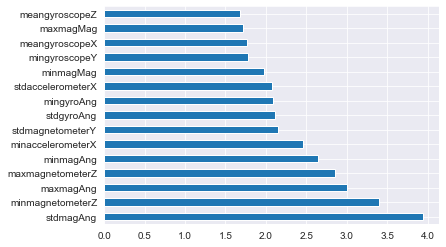

In [67]:
ranking_series = pd.Series(abs(svm.coef_[0]), index=feature_columns)
print(ranking_series.sort_values(ascending=False))
ranking_series.nlargest(15).plot(kind='barh')

In [ ]:
top_15_features = ["stdmagAng", "minmagnetometerZ", "maxmagAng", "maxmagnetometerZ", "minmagAng", "minaccelerometerX", "stdmagnetometerY", "stdgyroAng", "mingyroAng", "stdaccelerometerX", "minmagMag", "mingyroscopeY", "meangyroscopeX", "maxmagMag", "meangyroscopeZ"]